# LOGISTIC REGRESSION

### Notes

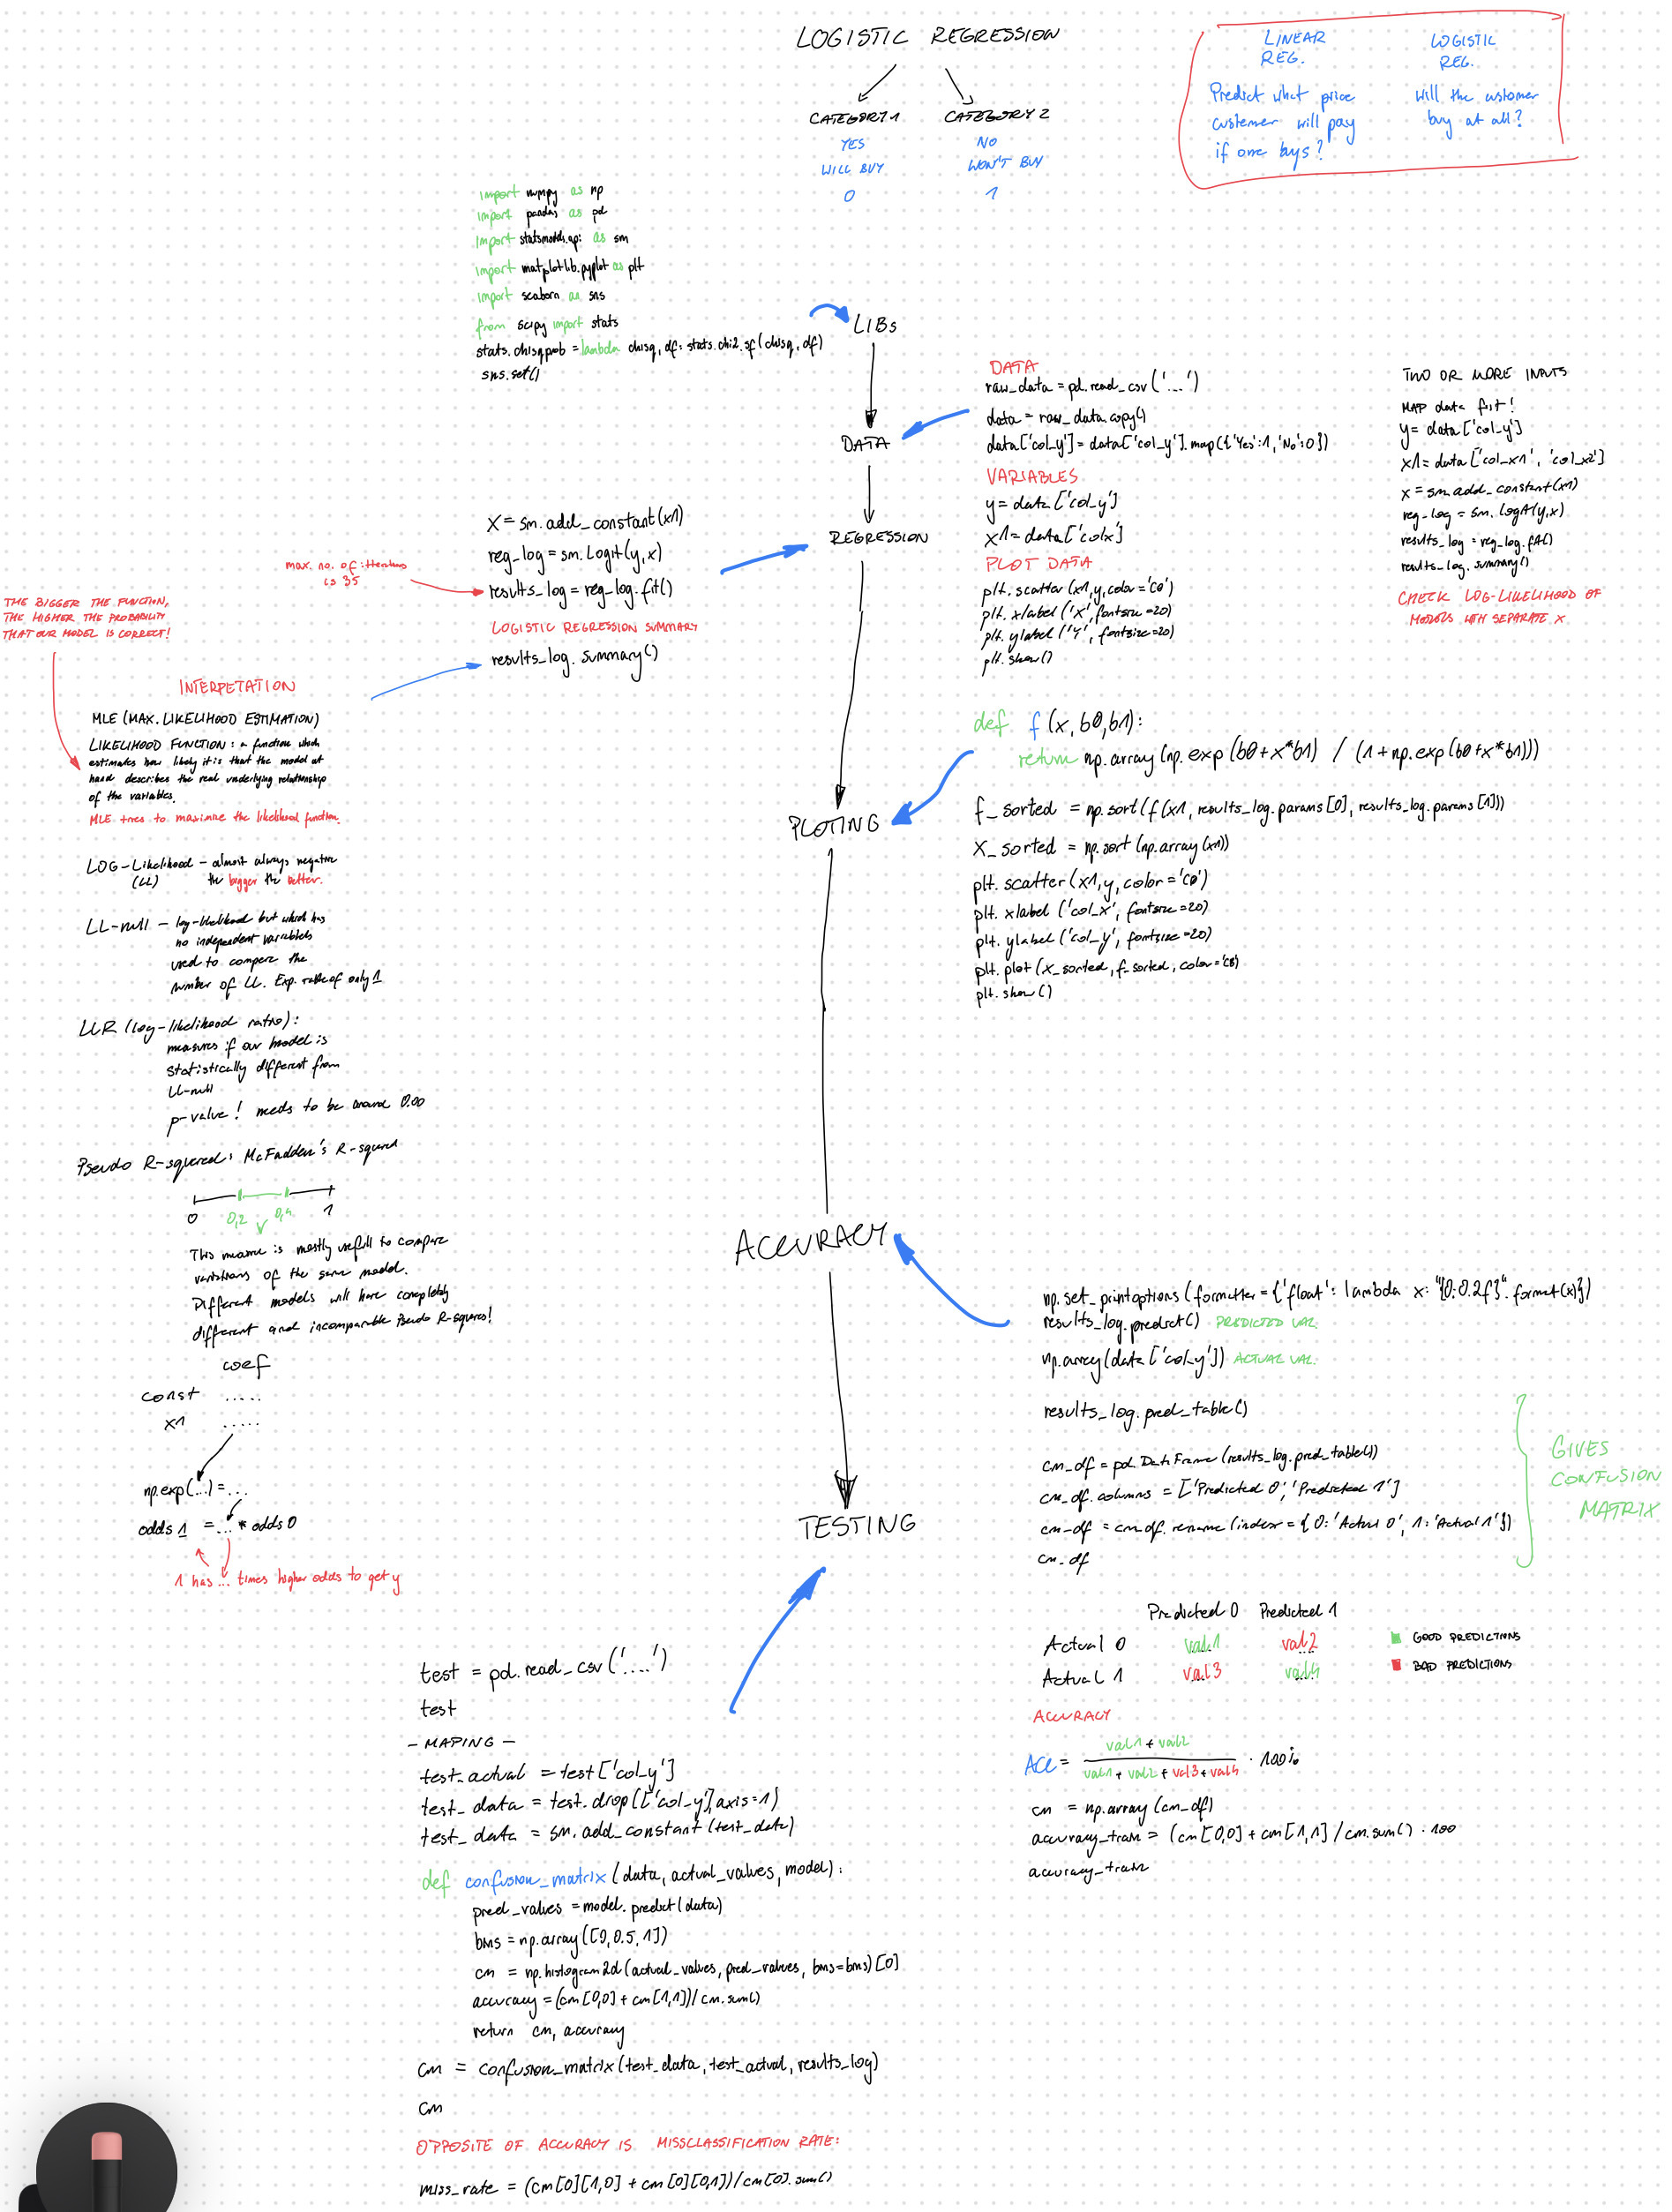

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)
sns.set()

In [36]:
raw_data = pd.read_csv('TrustProperty.csv')
raw_data.head()

,Price,Resid_area,Air_qual,Num_rooms,Age,Teachers,Poor_prop,N_hos_beds,N_hot_rooms,Rainfall,Parks,Airport,Sold
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,Yes,0
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,No,1
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,No,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,Yes,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,No,0


In [37]:
data = raw_data.copy()
data['Airport'] = data['Airport'].map({'Yes':1,'No':0})

In [38]:
data.columns.values

array(['Price', 'Resid_area', 'Air_qual', 'Num_rooms', 'Age', 'Teachers',
       'Poor_prop', 'N_hos_beds', 'N_hot_rooms', 'Rainfall', 'Parks',
       'Airport', 'Sold'], dtype=object)

In [39]:
data.head()

,Price,Resid_area,Air_qual,Num_rooms,Age,Teachers,Poor_prop,N_hos_beds,N_hot_rooms,Rainfall,Parks,Airport,Sold
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,1,0
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,0,1
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,1,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,0,0


In [40]:
y = data['Sold']
cols = ['Price', 'Resid_area', 'Air_qual', 'Num_rooms', 'Age', 'Teachers','Poor_prop', 'N_hos_beds', 'N_hot_rooms', 'Rainfall', 'Parks','Airport']
x1 = data[cols]

In [42]:
y = data['Sold']
cols = ['Price', 'Num_rooms','Poor_prop','Airport']
x1 = data[cols]

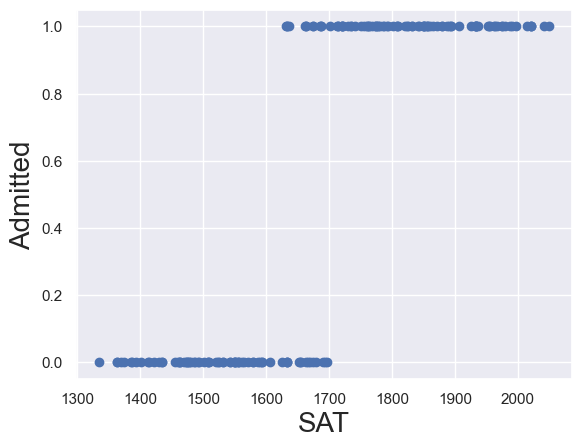

In [9]:
plt.scatter(x1,y,color = 'C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

In [43]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.625240
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  300
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            4
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                 0.09226
Time:                        08:59:36   Log-Likelihood:                -187.57
converged:                       True   LL-Null:                       -206.64
Covariance Type:            nonrobust   LLR p-value:                 1.055e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1113      2.200     -0.051      0.960      -4.422       4.200
Price         -0.1782      0.039     -4.563      0.000      -0.255      -0.102
Num_rooms      0.9273      0.431      2.149      0.032       0.082       1.773
Poor_prop     -0.1339      0.033     -4.047      0.000      -0.199      -0.069
Airport       -0.2010      0.255     -0.790      0.430      -0.700       0.298
==============================================================================
"""

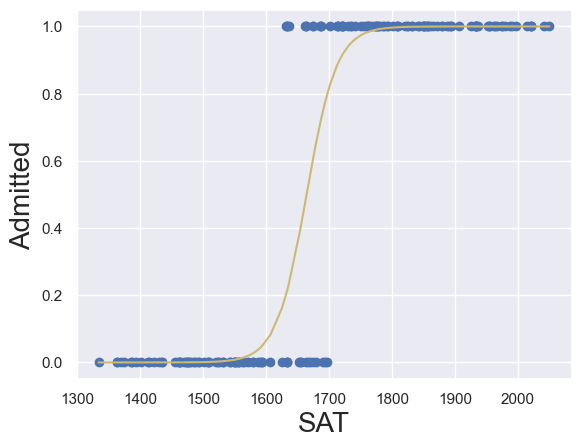

In [12]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1+np.exp(b0+x*b1)))
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color = 'C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In [31]:
results_log.predict()
np.array(data['Sold'])
results_log.pred_table()
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,107.0,57.0
Actual 1,57.0,79.0


In [32]:
cm = np.array(cm_df)
accuracy_train = ((cm[0,0]+cm[1,1])/cm.sum()*100)
accuracy_train

62.0

In [44]:
test = pd.read_csv('TrustProperty_Test.csv')
test

,Price,Num_rooms,Poor_prop,Airport,Sold
0,9.6,6.461,18.05,1,0
1,8.2,6.152,26.45,0,1
2,8.4,5.935,34.02,1,0
3,12.8,5.627,22.88,1,0
4,10.5,5.818,22.11,0,1
5,17.1,6.406,19.52,1,0
6,14.8,6.219,16.59,0,0
7,15.4,6.485,18.85,0,0
8,10.8,5.854,23.79,0,0
9,11.8,6.459,23.98,1,0


In [45]:
test_actual = test['Sold']
test_data = test.drop(['Sold'],axis = 1)
test_data = sm.add_constant(test_data)
def confusion_matrix(data, actual_values,model):
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm  = np.histogram2d(actual_values,pred_values,bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm,accuracy
cm = confusion_matrix(test_data,test_actual,results_log)
cm

(array([[3., 5.],
        [0., 2.]]),
 0.5)

In [55]:
miss_rate = (cm[0][1,0]+cm[0][0,1])/cm[0].sum()
miss_rate

0.5